# constructing 2D/3D local box using GeoPoints.jl and getTopo.jl (make_2Dtable_From1DEarthModels.ipynb is the source of reflexion)

Nobuaki Fuji October 2025

In [2]:
using Pkg


cd(@__DIR__)
Pkg.activate("../..")
ParamFile = "../test/testparam.csv"
include("../src/batchRevise.jl") 

include("../src/batchDrWatson.jl")
include("../src/DSM1D.jl")
include("../src/GeoPoints.jl")
include("../src/getSeismicParamTopo.jl")
using .DSM1D

  Activating project at `~/Documents/Github/flexibleDSM`
┌ Info: Including with Revise: ../src/batchDrWatson.jl
└ @ Main /Users/nobuaki/Documents/Github/flexibleDSM/OPTmotors/src/batchRevise.jl:25
┌ Info: Including with Revise: ../src/DSM1D.jl
└ @ Main /Users/nobuaki/Documents/Github/flexibleDSM/OPTmotors/src/batchRevise.jl:25
┌ Info: Including with Revise: ../src/GeoPoints.jl
└ @ Main /Users/nobuaki/Documents/Github/flexibleDSM/OPTmotors/src/batchRevise.jl:25
┌ Info: Including with Revise: ../src/getSeismicParamTopo.jl
└ @ Main /Users/nobuaki/Documents/Github/flexibleDSM/OPTmotors/src/batchRevise.jl:25


In [3]:
set_default_planet!(:Earth) # if you wish to go to other telluric bodies, otherwise this is not necessary

Ellipsoid(Earth)

In [4]:
# two (extreme) points that can define the slice (or the x-y local plane for 3D box)
p1 = GeoPoint(48.8566,2.3522) # Paris
p2 = GeoPoint(42.8,1.5) # Tarascon (à peu près)


Δx = 50.0 # in metre
Δz = 50.0

altMax = 20.e3 # in metre
altMin = -100.e3 # in metre

-100000.0

In [5]:
@show p1

p1 = GeoPoint(48.8566, 2.3522, 0.0, [4.200914795649138e6, 172559.77631070156, 4.780081341967356e6], 6.366053693814456e6)


GeoPoint(48.8566, 2.3522, 0.0, [4.200914795649138e6, 172559.77631070156, 4.780081341967356e6], 6.366053693814456e6)

In [6]:
# make a box/rectangle

allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δz,altMin,altMax)


(GeoPoint[GeoPoint(48.907887632772656, 2.359796896592829, -99838.236349905, [4.1310335068414416e6, 170237.94705026117, 4.708588583009119e6], 6.266197031478216e6) GeoPoint(48.90786158120419, 2.359793033943057, -99788.31851958811, [4.1310684474858455e6, 170239.1079648914, 4.708624329388598e6], 6.266246958667047e6) … GeoPoint(48.84655971568837, 2.3507145504395814, 19918.333283166365, [4.214856112766273e6, 173022.98124815943, 4.794344147379525e6], 6.3859756346916575e6) GeoPoint(48.8465346306368, 2.350710839849349, 19968.254166095423, [4.214891053410677e6, 173024.14216278965, 4.794379893759004e6], 6.3860255645881295e6); GeoPoint(48.90743406019147, 2.3597254009107855, -99841.10145693675, [4.1310692251434894e6, 170234.2553377939, 4.708553789702897e6], 6.266194334294425e6) GeoPoint(48.90740801221654, 2.359721538898719, -99791.1836038201, [4.1311041657878933e6, 170235.4162524241, 4.708589536082376e6], 6.266244261504746e6) … GeoPoint(48.846114603919595, 2.3506445526634843, 19915.521856576263, [4

In [7]:
allGridsInCartesian[20,30]

localCoord2D(Integer[20, 30], [950.0, -98550.0], [0.998552590032688, 0.05378405840963351], [-0.053784058409633496, 0.9985525900326878])

In [17]:
seismicModel=getParamsAndTopo(allGridsInGeoPoints,2.0)

(size(x), size(y), size(z)) = ((54,), (371,), (371, 54))


(ρ = [3.3725411830199197 3.3725466123043066 … 0.0 0.0; 3.372540871685798 3.3725463009725205 … 0.0 0.0; … ; 3.3722953694174187 3.372300798699781 … 0.0 0.0; 3.372295644537562 3.3723010738175865 … 0.0 0.0], Vpv = [7.936501067356701 7.936557665529301 … 0.0 0.0; 7.936497821819892 7.936554420016829 … 0.0 0.0; … ; 7.933938556405155 7.933995154556642 … 0.0 0.0; 7.933941424425364 7.933998022552484 … 0.0 0.0], Vph = [8.135589067359293 8.135625271998045 … 0.0 0.0; 8.135586991258911 8.135623195913233 … 0.0 0.0; … ; 8.133949883989178 8.133986088614426 … 0.0 0.0; 8.133951718600276 8.133987923209938 … 0.0 0.0], Vsv = [4.413419311905491 4.413407802512621 … 0.0 0.0; 4.4134199718942595 4.413408462496439 … 0.0 0.0; … ; 4.413940405501318 4.413928896112741 … 0.0 0.0; 4.413939822281581 4.4139283128979585 … 0.0 0.0], Vsh = [4.544031640720238 4.54407647387508 … 0.0 0.0; 4.5440290698306205 4.544073903004742 … 0.0 0.0; … ; 4.542001796910794 4.5420466300489135 … 0.0 0.0; 4.542004068757892 4.542048901876709 … 0.0

In [18]:
Nx,Nz=size(allGridsInCartesian)

(13522, 2401)

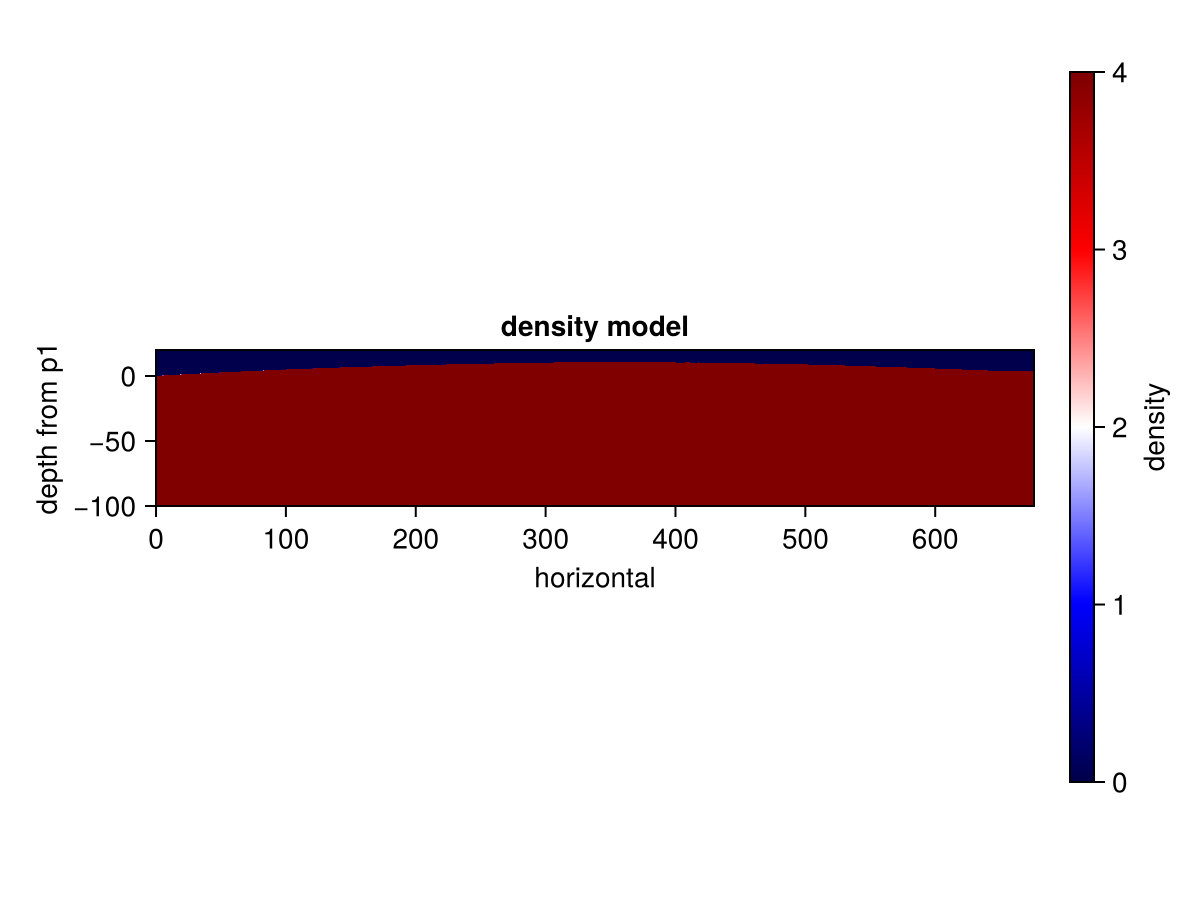

In [19]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.Vph;
    colormap = :seismic,
    colorrange=(0,4),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "density model")
)
Colorbar(fig[1,2], hm, label="density")
fig

# let's try with mount fuji

In [20]:
# two (extreme) points that can define the slice (or the x-y local plane for 3D box)
p1 = GeoPoint(38.9,135.0) # 
p2 = GeoPoint(39.0,150.0)

GeoPoint(39.0, 150.0, 0.0, [-4.298367562527705e6, 2.4816636693013264e6, 3.9923170227517276e6], 6.3697106276716925e6)

In [24]:
allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δz,altMin,altMax)

(GeoPoint[GeoPoint(38.86190142368741, 134.22706794034525, -596578.4653156134, [-3.144645896219958e6, 3.2306552609614143e6, 3.6060706302510207e6], 5.773186002386349e6) GeoPoint(38.86192385308317, 134.22749396412962, -596280.3527653416, [-3.144830841872935e6, 3.2307972019320205e6, 3.6062594366765157e6], 5.773484104821405e6) … GeoPoint(38.90520770697336, 135.11461029460082, 99093.11846800655, [-3.5759391589625007e6, 3.561661604415419e6, 4.0463672145054317e6], 6.468837754001324e6) GeoPoint(38.90522298416225, 135.1149502409491, 99391.61517265337, [-3.576124104615478e6, 3.561803545386025e6, 4.0465560209309263e6], 6.469136243585278e6); GeoPoint(38.86219592689636, 134.23083782825722, -596612.0403572128, [-3.1448272531816014e6, 3.2304162930951794e6, 3.6060726330916714e6], 5.773152320368936e6) GeoPoint(38.8622183274374, 134.23126366335657, -596313.9260782666, [-3.1450121988345785e6, 3.2305582340657855e6, 3.6062614395171665e6], 5.773450424543107e6) … GeoPoint(38.90544509628701, 135.1179853133858,

In [25]:
seismicModel=getParamsAndTopo(allGridsInGeoPoints,1.0)
Nx,Nz=size(allGridsInCartesian)


┌ Info: File /Users/nobuaki/Documents/Github/flexibleDSM/data/topoViaGMT/topoViaGMT_b46d33b3.jld2 does not exist. Producing it now...
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:106
┌ Warning: The Git repository ('/Users/nobuaki/Documents/Github/flexibleDSM') is dirty! Appending -dirty to the commit ID.
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_tools.jl:71
┌ Info: File /Users/nobuaki/Documents/Github/flexibleDSM/data/topoViaGMT/topoViaGMT_b46d33b3.jld2 saved.
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:115


(4323, 2334)

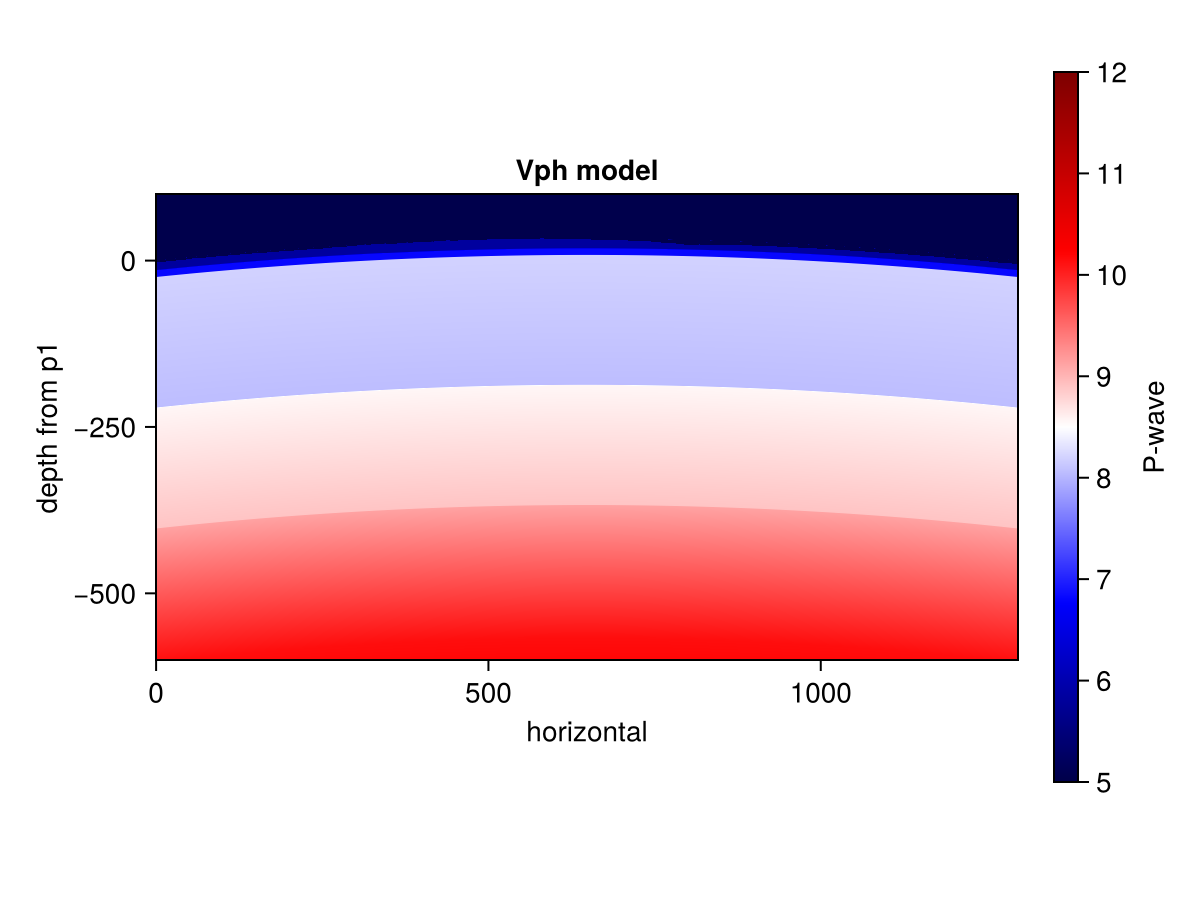

In [28]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.Vph;
    colormap = :seismic,
    colorrange=(5,12),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "Vph model")
)
Colorbar(fig[1,2], hm, label="P-wave")
fig

# Let's go to Mars

In [ ]:
set_default_planet!(:Mars)


Ellipsoid(Mars)

# ok i need to change how to call 1D planet models too (because it is already called by DSM1D and it is not very much flexible but here I just use the same params as Earth)

In [34]:
p1 = GeoPoint(15.0,135.0) # we should see Elysium planitia at least
p2 = GeoPoint(15.0,180.0) # 

GeoPoint(15.0, 180.0, 0.0, [-3.281768413646896e6, 0.0, 869020.2487787417], 3.3948785123473755e6)

In [35]:
Δx = 3.e3 # in metre
Δy = 3.e3
Δz = 3.e3

horizontalDepthMin = -1000.e3
horizontalDepthMax = 1000.e3


altMax = 100.e3 # in metre
altMin = -600.e3 # in metre



-600000.0

In [37]:
allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δy,Δz,horizontalDepthMin,horizontalDepthMax,altMin,altMax)

(GeoPoint[GeoPoint(-4.963653321425992, 132.80185665942892, -379373.71227101434, [-2.0422418899470621e6, 2.2052772739627166e6, -257588.98781908385], 3.0166789485718627e6) GeoPoint(-4.909597180901, 132.79527125283124, -380370.0400157871, [-2.041478231301609e6, 2.204960956194747e6, -254705.1070062049], 3.015685805709315e6) … GeoPoint(33.761713917581346, 127.56589367035907, -375066.6186233803, [-1.534408890720767e6, 1.99492595826258e6, 1.660191752745397e6], 3.0150251870849505e6) GeoPoint(33.81509473819276, 127.55650097800321, -374058.11040834157, [-1.5336452320753138e6, 1.9946096404946097e6, 1.6630756335582756e6], 3.0160165581038576e6); GeoPoint(-4.9657392787162955, 132.85383473591983, -380621.2905938573, [-2.0433899402441573e6, 2.202505635365183e6, -257588.98781908385], 3.015431247492151e6) GeoPoint(-4.911661691140075, 132.8472595811561, -381618.03198251064, [-2.0426262815987044e6, 2.2021893175972127e6, -254705.1070062049], 3.014437693559459e6) … GeoPoint(33.777597418131904, 127.625114830

In [38]:
Nx,Ny,Nz=size(allGridsInCartesian)

(838, 667, 234)

In [53]:
seismicModel=getParamsAndTopo(allGridsInGeoPoints,2.0)

┌ Info: File /Users/nobuaki/Documents/Github/flexibleDSM/data/topoViaGMT/topoViaGMT_aba5258d.jld2 does not exist. Producing it now...
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:106
grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]

grdblend [NOTICE]: MOLA Mars Relief at 01x01 arc minutes reduced by Gaussian Cartesian filtering (2.8 km fullwidth) [Neumann et al., 2003].
grdblend [NOTICE]:   -> Download 30x30 degree grid tile (mars_relief_01m_g): S90W180
grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]

grdblend [NOTICE]: SRTM15 Earth Relief v2.7 at 01x01 arc minutes reduced by Gaussian Cartesian filtering (5.2 km fullwidth) [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 30x30 degree grid tile (earth_relief_01m_g): S30W180
┌ Warning: The Git repository ('/Users/nobuaki/Documents/Github/flexibleDSM') is dirty! Appending -dirty

(ρ = [4.406697360843551 4.407854689199029 … 4.402448343512155 4.401274570985653; 4.408147069120241 4.4093043208026135 … 4.403898538321011 4.402724504890485; … ; 4.408512329862256 4.409669387143101 … 4.4042636616631 4.403089822183631; 4.4070633450713235 4.4082207943201315 … 4.402814507110871 4.401640612351664;;; 4.403744625372664 4.404901968631146 … 4.399487554627078 4.398313483289212; 4.405194366020408 4.406352014259202 … 4.400938008553518 4.399763712113078; … ; 4.405559634759325 4.406717087968948 … 4.4013033040159035 4.400129038441853; 4.404110617867798 4.405268081817767 … 4.399853727331835 4.398679792389989;;; 4.400787672237271 4.4019453261151575 … 4.396522830047267 4.395348327670285; 4.4022377414323905 4.403395578837358 … 4.397973321941846 4.3967989840735875; … ; 4.4026030187429415 4.4037608722360195 … 4.3983387795686815 4.39716432001072; 4.401153967471675 4.402311447943253 … 4.396889012432012 4.395714706327724;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.

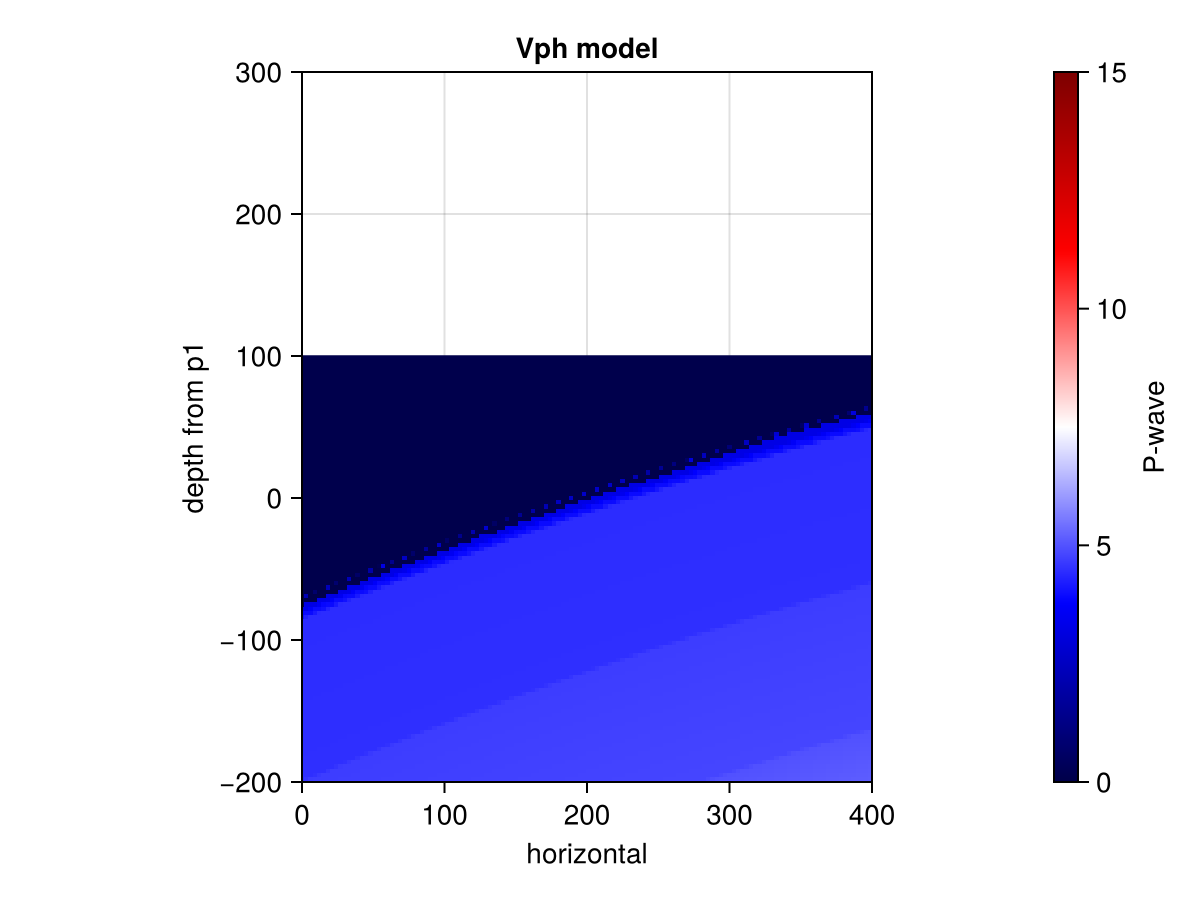

In [63]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.Vsv[:,(Ny÷6)*1,:];
    colormap = :seismic,
    colorrange=(0,15),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "Vph model")
)
ylims!(ax,-200,300)
xlims!(ax,0,400)
Colorbar(fig[1,2], hm, label="P-wave")
fig

# Hesaneh, please look at the boundary (for Mt Fuji case) if this strange bubbles happening. 
Maybe the topo Interpolator is doing something nasty!